<a href="https://colab.research.google.com/github/assaabriiii/My-Machine-Learning-Journey/blob/main/CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# 1. Load Data (CIFAR-10 is built into Keras!)
print("Loading CIFAR-10 Data...")
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

Loading CIFAR-10 Data...


In [17]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Normalize (0-255 -> 0-1)
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# One-hot encode labels (10 classes)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [25]:
def build_simple_model():
    model = Sequential([
        # Block 1
        Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
        MaxPooling2D((2, 2)),

        # Block 2
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 2)),

        # Head
        Flatten(),
        Dense(128, activation='relu'),
        # Dropout(0.5),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [31]:
def build_vgg_model():
    model = Sequential([
        # Block 1 (Double Conv)
        Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
        Conv2D(32, (3, 3), activation='relu', padding='same'), # <--- The Extra Layer
        MaxPooling2D((2, 2)),
        Dropout(0.2), # Dropout is needed more in bigger models

        # Block 2 (Double Conv)
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        Conv2D(64, (3, 3), activation='relu', padding='same'), # <--- The Extra Layer
        MaxPooling2D((2, 2)),
        Dropout(0.2),

        # Head
        Flatten(),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [27]:
epochs = 10

print("\n--- Training Model A (Simple) ---")
model_a = build_simple_model()
history_a = model_a.fit(X_train, y_train, epochs=epochs, batch_size=64, validation_data=(X_test, y_test), verbose=1)


--- Training Model A (Simple) ---
Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.3855 - loss: 1.6895 - val_accuracy: 0.6004 - val_loss: 1.1472
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6161 - loss: 1.0931 - val_accuracy: 0.6595 - val_loss: 0.9797
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6797 - loss: 0.9158 - val_accuracy: 0.6767 - val_loss: 0.9302
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7128 - loss: 0.8222 - val_accuracy: 0.7000 - val_loss: 0.8646
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7460 - loss: 0.7289 - val_accuracy: 0.7084 - val_loss: 0.8505
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7657 - loss: 0.6609 - val_accuracy: 0.7048 - val_loss: 0.8664
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7914 - loss: 0.5995 - val_accuracy: 0.7119 - val_loss: 0.8609
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.815

In [32]:
print("\n--- Training Model B (VGG Style) ---")
model_b = build_vgg_model()
history_b = model_b.fit(X_train, y_train, epochs=epochs, batch_size=64, validation_data=(X_test, y_test), verbose=1)


--- Training Model B (VGG Style) ---
Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 16s 13ms/step - accuracy: 0.3603 - loss: 1.7381 - val_accuracy: 0.6031 - val_loss: 1.1186
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6256 - loss: 1.0608 - val_accuracy: 0.6620 - val_loss: 0.9451
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6927 - loss: 0.8627 - val_accuracy: 0.7113 - val_loss: 0.8321
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7328 - loss: 0.7581 - val_accuracy: 0.7234 - val_loss: 0.8001
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7645 - loss: 0.6648 - val_accuracy: 0.7418 - val_loss: 0.7442
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7889 - loss: 0.5987 - val_accuracy: 0.7467 - val_loss: 0.7336
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8109 - loss: 0.5343 - val_accuracy: 0.7595 - val_loss: 0.7186
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 

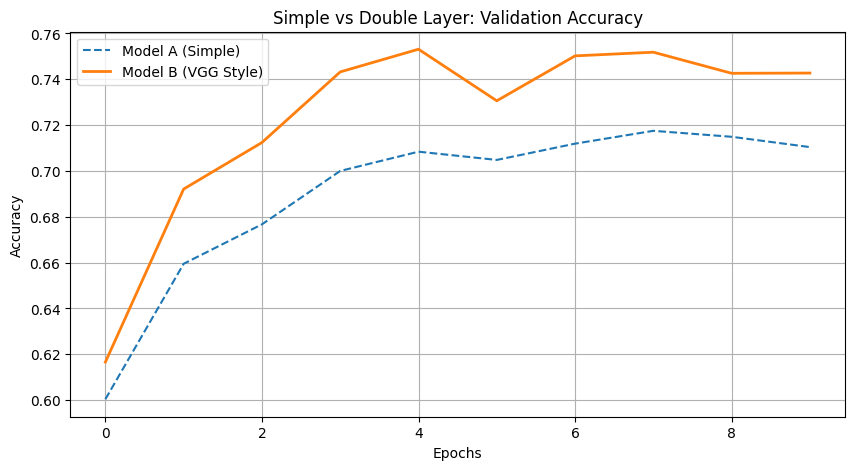

In [30]:
# 4. Visualization
plt.figure(figsize=(10, 5))
plt.plot(history_a.history['val_accuracy'], label='Model A (Simple)', linestyle='--')
plt.plot(history_b.history['val_accuracy'], label='Model B (VGG Style)', linewidth=2)
plt.title('Simple vs Double Layer: Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.grid(True)
plt.show()

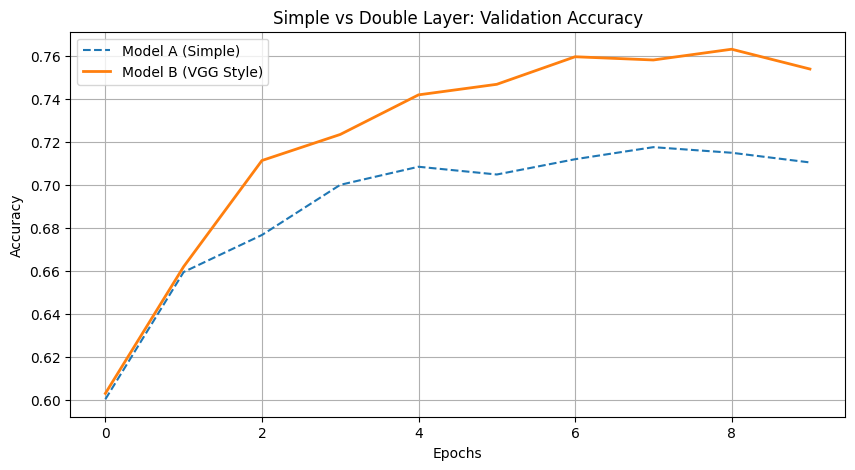

In [33]:
# 4. Visualization less shaky when the model has dropout
plt.figure(figsize=(10, 5))
plt.plot(history_a.history['val_accuracy'], label='Model A (Simple)', linestyle='--')
plt.plot(history_b.history['val_accuracy'], label='Model B (VGG Style)', linewidth=2)
plt.title('Simple vs Double Layer: Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.grid(True)
plt.show()